# Desafio 3

## Importando

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd   
import seaborn as sns
import warnings
from gambis import ColabOuCode

warnings.filterwarnings('ignore')

In [2]:
drive = '/content/drive/MyDrive/Colab Notebooks/TERA-desafio-3/data/fraud_detection_dataset.csv'
local = './data/fraud_detection_dataset.csv'

df = ColabOuCode(drive,local,ncolunas=None)

In [3]:
df.shape


(6362620, 11)

In [4]:
print(df.info())
print()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [5]:
pd.set_option('display.max_columns', 11)
df.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.rename(columns={'oldbalanceOrg':'oldbalanceOrig'}, inplace=True)


## Tratamento

In [7]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for v in varMonet: df[v][df[v] > 0] = np.log(df[v][df[v] > 0])

df.head()


,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9.194174,C1231006815,12.044353,11.984780,M1979787155,0.000000,0.0,0,0
1,1,PAYMENT,7.530630,C1666544295,9.964065,9.872240,M2044282225,0.000000,0.0,0,0
2,1,TRANSFER,5.198497,C1305486145,5.198497,0.000000,C553264065,0.000000,0.0,1,0
3,1,CASH_OUT,5.198497,C840083671,5.198497,0.000000,C38997010,9.960907,0.0,1,0
4,1,PAYMENT,9.364617,C2048537720,10.634749,10.305141,M1230701703,0.000000,0.0,0,0


In [8]:
df.describe(percentiles=(0.9,0.95,0.99))


,step,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.084064e+01,7.414119e+00,5.366048e+00,7.722404e+00,8.330596e+00,1.290820e-03,2.514687e-06
std,1.423320e+02,1.815323e+00,5.670036e+00,6.330029e+00,6.747646e+00,6.675098e+00,3.590480e-02,1.585775e-03
min,1.000000e+00,-4.605170e+00,-2.995732e+00,-4.605170e+00,-4.605170e+00,-4.605170e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,1.122353e+01,9.561560e+00,0.000000e+00,1.179589e+01,1.227682e+01,0.000000e+00,0.000000e+00
90%,3.990000e+02,1.280881e+01,1.441572e+01,1.449372e+01,1.488513e+01,1.497706e+01,0.000000e+00,0.000000e+00
95%,4.900000e+02,1.315895e+01,1.557745e+01,1.560397e+01,1.545397e+01,1.552311e+01,0.000000e+00,0.000000e+00
99%,6.810000e+02,1.429545e+01,1.658980e+01,1.659905e+01,1.633093e+01,1.639101e+01,0.000000e+00,0.000000e+00
max,7.430000e+02,1.834213e+01,1.790292e+01,1.771920e+01,1.969049e+01,1.969094e+01,1.000000e+00,1.000000e+00


Criando a nova feature.

Notei que tanto ```nameOrig ``` quanto ```nameDest``` possuem uma letra **C** ou **M** antes do número identificador. 

Aqui vou supor que M identifica uma loja (*market*) e C um cliente comum (*customer*).

In [9]:
df['prefixDest'] = None
df['prefixOrig'] = None

df['prefixDest'] = df['nameDest'].str[0]
df['prefixOrig'] = df['nameOrig'].str[0]


In [10]:
print(df['prefixDest'].unique())
print(df['prefixOrig'].unique())


['M' 'C']
['C']


In [11]:
# convertendo nameOrig e nameDest para int.
df['nameOrig'] = df['nameOrig'].str[1:]
df['nameDest'] = df['nameDest'].str[1:]

df[['nameOrig','nameDest']] = df[['nameOrig','nameDest']].astype(int)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 13 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        int64  
 4   oldbalanceOrig  float64
 5   newbalanceOrig  float64
 6   nameDest        int64  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
 11  prefixDest      object 
 12  prefixOrig      object 
dtypes: float64(5), int64(5), object(3)
memory usage: 631.1+ MB


## AED

<AxesSubplot:>

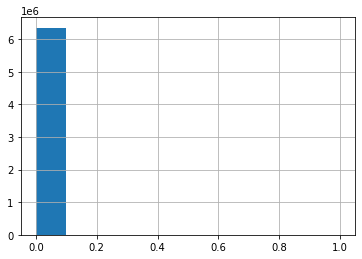

In [12]:
df['isFraud'].hist()


In [13]:
for t in df.type.unique():
    print(t)
    print(df['isFraud'][df['type'] == t].value_counts(normalize=False))
    

PAYMENT
0    2151495
Name: isFraud, dtype: int64
TRANSFER
0    528812
1      4097
Name: isFraud, dtype: int64
CASH_OUT
0    2233384
1       4116
Name: isFraud, dtype: int64
DEBIT
0    41432
Name: isFraud, dtype: int64
CASH_IN
0    1399284
Name: isFraud, dtype: int64


Como não existem fraudes em ```PAYMENT```, ```DEBIT``` e nem em ```CASH_IN```, vou remover essas linhas.

In [14]:
semFraude = ['PAYMENT','DEBIT','CASH_IN']

for i in semFraude:
    df = df.drop(df[df.type == i].index)

In [15]:
for t in df.type.unique():
    print(t)
    print(df['isFraud'][df['type'] == t].value_counts(normalize=True))

TRANSFER
0    0.992312
1    0.007688
Name: isFraud, dtype: float64
CASH_OUT
0    0.99816
1    0.00184
Name: isFraud, dtype: float64


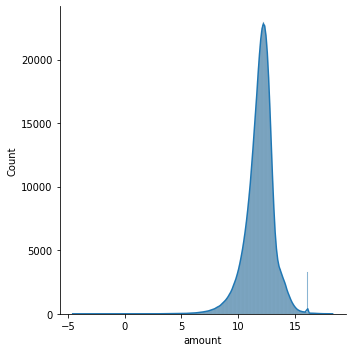

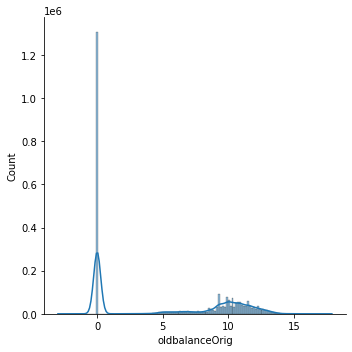

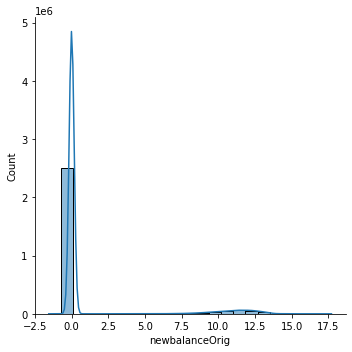

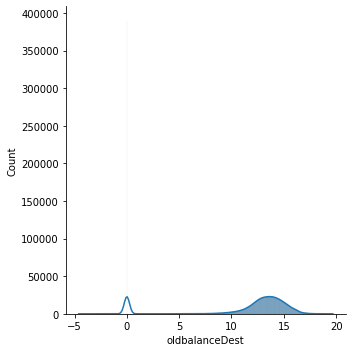

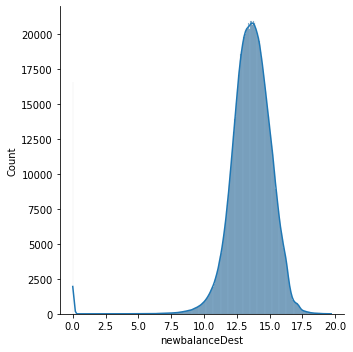

In [16]:
varMonet = ['amount', 'oldbalanceOrig', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

for v in varMonet:
    sns.displot(df[v], kde=True)
    plt.show()


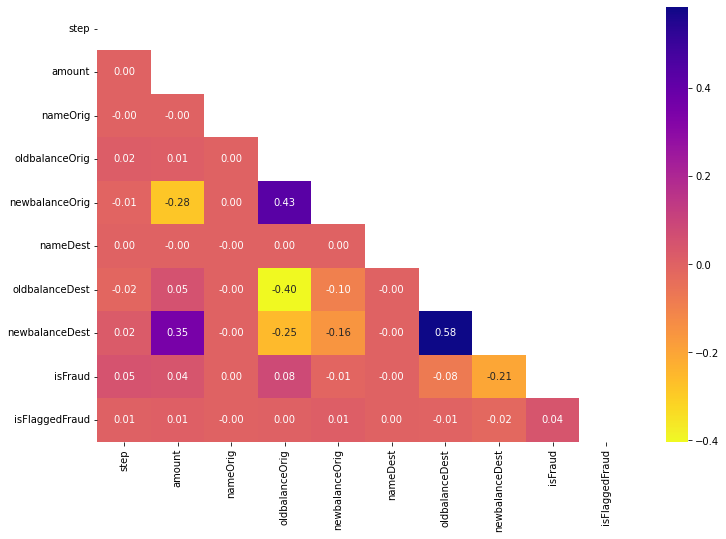

In [17]:
sns.set_context(font_scale=1.9)
plt.figure(figsize=(12,8))

sns.heatmap(
    df.corr(), 
    annot=True,
    fmt='.2f', 
    cmap='plasma_r', 
    mask=np.triu(np.ones_like(df.corr()))
)

plt.show()


Tanto ```nameOrig``` quanto ```nameDest``` tem valores repetidos. Então vou utilizar estas colunas para criar uma feature que indica se o usuário aparece em alguma outra transação e na mesma posição.

Utilizarei apenas as colunas ```oldbalanceOrig```, ```oldbalanceDest``` e ```amount```.


In [18]:
# Criação de feature

df['destReinc'] = 0
df['origReinc'] = 0

df.loc[df['nameDest'].duplicated(), 'destReinc'] = 1
df.loc[df['nameOrig'].duplicated(), 'origReinc'] = 1


In [19]:
# Selecionando colunas para continuar e resentando os índices após os tratamentos das variáveis

colsSelect = [
#    'step',
    'type',
#    'prefixOrig',
#    'nameOrig',
    'oldbalanceOrig',
    'origReinc',
#    'newbalanceOrig',
#    'prefixDest',
#    'nameDest',
    'oldbalanceDest',
    'destReinc',
#    'newbalanceDest',
    'amount',
    'isFraud',
#    'isFlaggedFraud'
]

df = df[colsSelect]
df.reset_index(drop=True, inplace=True)

df


,type,oldbalanceOrig,origReinc,oldbalanceDest,destReinc,amount,isFraud
0,TRANSFER,5.198497,0,0.000000,0,5.198497,1
1,CASH_OUT,5.198497,0,9.960907,0,5.198497,1
2,CASH_OUT,9.637241,0,8.533657,0,12.342062,0
3,TRANSFER,6.558198,0,10.017932,0,12.279836,0
4,TRANSFER,9.290537,0,8.743053,0,12.649751,0
...,...,...,...,...,...,...,...
2770404,CASH_OUT,12.735766,0,0.000000,0,12.735766,1
2770405,TRANSFER,15.657870,0,0.000000,0,15.657870,1
2770406,CASH_OUT,15.657870,0,11.134426,1,15.657870,1
2770407,TRANSFER,13.652995,0,0.000000,0,13.652995,1


In [20]:
# Criando os dummies

df = pd.get_dummies(df,
                    columns=['type'],
                    drop_first=False
)


df['isFraud'] = df['isFraud'] - 1
df['isFraud'][df['isFraud'] == -1] = 1

pd.set_option('display.max_columns', 20)
df.head()

,oldbalanceOrig,origReinc,oldbalanceDest,destReinc,amount,isFraud,type_CASH_OUT,type_TRANSFER
0,5.198497,0,0.000000,0,5.198497,0,0,1
1,5.198497,0,9.960907,0,5.198497,0,1,0
2,9.637241,0,8.533657,0,12.342062,1,1,0
3,6.558198,0,10.017932,0,12.279836,1,0,1
4,9.290537,0,8.743053,0,12.649751,1,0,1


In [21]:
cols= ['oldbalanceOrig', 'origReinc', 'oldbalanceDest', 
    'destReinc','amount', 'type_CASH_OUT', 'type_TRANSFER',
    'isFraud'
]

df = df[cols]


Ressolvi exportar o dataset em CSV e trabalhar a classificação em outro notebook por razões de: **facilita a vida demais**

In [22]:
import os

path = os.path.abspath('./data/dados_tratados.csv')
df.to_csv(
    path,
    index=False
)
